In [46]:
import numpy as np
import pandas as pd
import math

In [47]:
#loading the UCI Air_quality_data(csv file) into data frame
#few places had semicolor instead of , as a seperable symbol hence we used (sep=';')method
air_data=pd.read_csv('AirQualityUCI.csv',sep=';',decimal=',')

In [48]:
air_data.head()
air_data.shape

(9471, 17)

REMOVING LAST TWO UNNAMED DATA COLUMNS FROM DATA FRAME USING SLICING


In [49]:
air_data=air_data.iloc[:,:-2]
air_data.head()


,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,10/03/2004,18.00.00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,10/03/2004,19.00.00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,10/03/2004,20.00.00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,10/03/2004,21.00.00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,10/03/2004,22.00.00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888


In [50]:
#printing last 5 rows
air_data.tail()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
9466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9467,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9468,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9469,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9470,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


DATA CLEANING

In [51]:
#remove nan rows we can check in csv file from where is the data missing
#data is missing from 9357th row
air_data.loc[9357]

Date             NaN
Time             NaN
CO(GT)           NaN
PT08.S1(CO)      NaN
NMHC(GT)         NaN
C6H6(GT)         NaN
PT08.S2(NMHC)    NaN
NOx(GT)          NaN
PT08.S3(NOx)     NaN
NO2(GT)          NaN
PT08.S4(NO2)     NaN
PT08.S5(O3)      NaN
T                NaN
RH               NaN
AH               NaN
Name: 9357, dtype: object

9356 is the last valid data set therefore we will remove other rows (data cleaning)

In [52]:
air_data=air_data.head(9357)

In [53]:
#NaN values removed
air_data.shape

(9357, 15)

CHECKING NUMBER OF MISSING VALUES
In UCI missing values are tagged with (-200) values therefore there was 0 missing values

In [54]:
#getting info about the data(find non-null count and datatypes)
air_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         9357 non-null   float64
 3   PT08.S1(CO)    9357 non-null   float64
 4   NMHC(GT)       9357 non-null   float64
 5   C6H6(GT)       9357 non-null   float64
 6   PT08.S2(NMHC)  9357 non-null   float64
 7   NOx(GT)        9357 non-null   float64
 8   PT08.S3(NOx)   9357 non-null   float64
 9   NO2(GT)        9357 non-null   float64
 10  PT08.S4(NO2)   9357 non-null   float64
 11  PT08.S5(O3)    9357 non-null   float64
 12  T              9357 non-null   float64
 13  RH             9357 non-null   float64
 14  AH             9357 non-null   float64
dtypes: float64(13), object(2)
memory usage: 1.1+ MB


In [55]:
#here we will count total no of -200 values
air_data.isin([-200]).sum(axis=0)

Date                0
Time                0
CO(GT)           1683
PT08.S1(CO)       366
NMHC(GT)         8443
C6H6(GT)          366
PT08.S2(NMHC)     366
NOx(GT)          1639
PT08.S3(NOx)      366
NO2(GT)          1642
PT08.S4(NO2)      366
PT08.S5(O3)       366
T                 366
RH                366
AH                366
dtype: int64

Handling the missing values

To handle the missing values first we will convert -200 values with NaN and then replace it with mean value

In [56]:
air_data=air_data.replace(to_replace=-200,value=np.nan)

In [57]:
air_data.tail()
#here we can see -200 values are converted to NaN

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
9352,04/04/2005,10.00.00,3.1,1314.0,NaN,13.5,1101.0,472.0,539.0,190.0,1374.0,1729.0,21.9,29.3,0.7568
9353,04/04/2005,11.00.00,2.4,1163.0,NaN,11.4,1027.0,353.0,604.0,179.0,1264.0,1269.0,24.3,23.7,0.7119
9354,04/04/2005,12.00.00,2.4,1142.0,NaN,12.4,1063.0,293.0,603.0,175.0,1241.0,1092.0,26.9,18.3,0.6406
9355,04/04/2005,13.00.00,2.1,1003.0,NaN,9.5,961.0,235.0,702.0,156.0,1041.0,770.0,28.3,13.5,0.5139
9356,04/04/2005,14.00.00,2.2,1071.0,NaN,11.9,1047.0,265.0,654.0,168.0,1129.0,816.0,28.5,13.1,0.5028


Find mean of all columns

In [58]:
mean_values=air_data.select_dtypes(float).mean()
mean_values

CO(GT)              2.152750
PT08.S1(CO)      1099.833166
NMHC(GT)          218.811816
C6H6(GT)           10.083105
PT08.S2(NMHC)     939.153376
NOx(GT)           246.896735
PT08.S3(NOx)      835.493605
NO2(GT)           113.091251
PT08.S4(NO2)     1456.264598
PT08.S5(O3)      1022.906128
T                  18.317829
RH                 49.234201
AH                  1.025530
dtype: float64

Replacing the missing values with mean values

In [59]:
air_data=air_data.fillna(mean_values)
air_data.tail()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
9352,04/04/2005,10.00.00,3.1,1314.0,218.811816,13.5,1101.0,472.0,539.0,190.0,1374.0,1729.0,21.9,29.3,0.7568
9353,04/04/2005,11.00.00,2.4,1163.0,218.811816,11.4,1027.0,353.0,604.0,179.0,1264.0,1269.0,24.3,23.7,0.7119
9354,04/04/2005,12.00.00,2.4,1142.0,218.811816,12.4,1063.0,293.0,603.0,175.0,1241.0,1092.0,26.9,18.3,0.6406
9355,04/04/2005,13.00.00,2.1,1003.0,218.811816,9.5,961.0,235.0,702.0,156.0,1041.0,770.0,28.3,13.5,0.5139
9356,04/04/2005,14.00.00,2.2,1071.0,218.811816,11.9,1047.0,265.0,654.0,168.0,1129.0,816.0,28.5,13.1,0.5028


In [60]:
#check missing values again
air_data.isnull().sum()

Date             0
Time             0
CO(GT)           0
PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64

Two Tasks can be done here:
1.Forecasting
2.Regression

Forecasting with FB Prophet Algorithm(python API)

documentation: https://facebook.github.io/prophet/docs/quick_start.html

In [61]:
#w.r.t FB Prophet we convert date from DD/MM/YYYY to YYYY-MM--DD
date_info=pd.to_datetime(air_data['Date'],dayfirst=True)

date_info

0      2004-03-10
1      2004-03-10
2      2004-03-10
3      2004-03-10
4      2004-03-10
          ...    
9352   2005-04-04
9353   2005-04-04
9354   2005-04-04
9355   2005-04-04
9356   2005-04-04
Name: Date, Length: 9357, dtype: datetime64[ns]

In [62]:
#time info
time_info=air_data['Time']
print(time_info)


0       18.00.00
1       19.00.00
2       20.00.00
3       21.00.00
4       22.00.00
          ...   
9352    10.00.00
9353    11.00.00
9354    12.00.00
9355    13.00.00
9356    14.00.00
Name: Time, Length: 9357, dtype: object


In [63]:
time_info=time_info.apply(lambda x:x.replace('.',':'))
print(time_info)

0       18:00:00
1       19:00:00
2       20:00:00
3       21:00:00
4       22:00:00
          ...   
9352    10:00:00
9353    11:00:00
9354    12:00:00
9355    13:00:00
9356    14:00:00
Name: Time, Length: 9357, dtype: object


In [64]:
#combining date and time to data frame
date_time=pd.concat([date_info,time_info],axis=1)
date_time.head()


,Date,Time
0,2004-03-10,18:00:00
1,2004-03-10,19:00:00
2,2004-03-10,20:00:00
3,2004-03-10,21:00:00
4,2004-03-10,22:00:00


In [65]:
date_time['ds']=date_time['Date'].astype(str)+' '+date_time['Time'].astype(str)
date_time.head()

,Date,Time,ds
0,2004-03-10,18:00:00,2004-03-10 18:00:00
1,2004-03-10,19:00:00,2004-03-10 19:00:00
2,2004-03-10,20:00:00,2004-03-10 20:00:00
3,2004-03-10,21:00:00,2004-03-10 21:00:00
4,2004-03-10,22:00:00,2004-03-10 22:00:00


In [66]:
date_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    9357 non-null   datetime64[ns]
 1   Time    9357 non-null   object        
 2   ds      9357 non-null   object        
dtypes: datetime64[ns](1), object(2)
memory usage: 219.4+ KB


We have to convert ds from object datatype to date time format

In [67]:
data=pd.DataFrame()      
data['ds']=date_time['ds'] 
data.head()

,ds
0,2004-03-10 18:00:00
1,2004-03-10 19:00:00
2,2004-03-10 20:00:00
3,2004-03-10 21:00:00
4,2004-03-10 22:00:00


I HAVE MADE A PREDICTION FOR RH VALUE(RELATIVE HUMIDITY)YOU CAN CHECK FOR WHATEVER DATA YOU WANT TO PREDICT FOR

In [68]:
data['y']=air_data['RH']
data.head()

,ds,y
0,2004-03-10 18:00:00,48.9
1,2004-03-10 19:00:00,47.7
2,2004-03-10 20:00:00,54.0
3,2004-03-10 21:00:00,60.0
4,2004-03-10 22:00:00,59.6


Training Prophet model

In [69]:
np.float_=np.float64
from prophet.forecaster import Prophet
model=Prophet(yearly_seasonality=False)
model.fit(data)

18:19:44 - cmdstanpy - INFO - Chain [1] start processing
18:19:45 - cmdstanpy - INFO - Chain [1] done processing


making predictions


In [70]:
future = model.make_future_dataframe(periods=365,freq='h')
future.tail()

,ds
9717,2005-04-19 15:00:00
9718,2005-04-19 16:00:00
9719,2005-04-19 17:00:00
9720,2005-04-19 18:00:00
9721,2005-04-19 19:00:00


In [71]:
forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()



,ds,yhat,yhat_lower,yhat_upper
9717,2005-04-19 15:00:00,33.553208,17.650205,48.952939
9718,2005-04-19 16:00:00,34.036737,18.959035,49.341066
9719,2005-04-19 17:00:00,35.670056,20.074932,51.503931
9720,2005-04-19 18:00:00,38.565679,23.117664,54.353614
9721,2005-04-19 19:00:00,42.119881,26.056838,56.974932


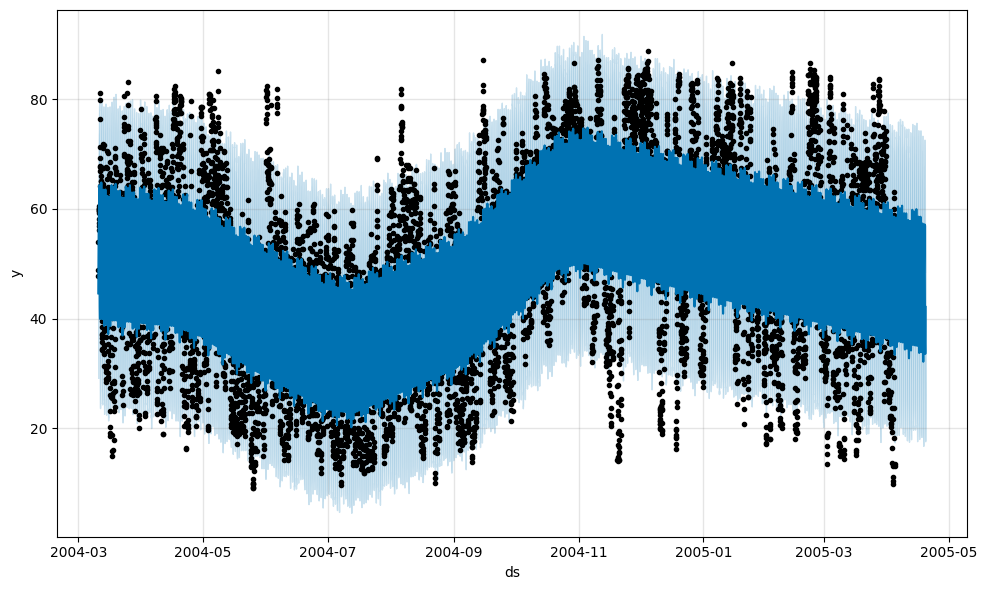

In [76]:
fig1 = model.plot(forecast)



c:\Users\nst\AppData\Local\Programs\Python\Python312\Lib\site-packages\prophet\plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
c:\Users\nst\AppData\Local\Programs\Python\Python312\Lib\site-packages\prophet\plot.py:397: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  artists += ax.plot(df_y['ds'].dt.to_pydatetime(), seas[name], ls='-',
c:\Users\nst\AppData\Local\Programs\Python\Python312\Lib\site-packages\prophet\plot.py:401: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series cont

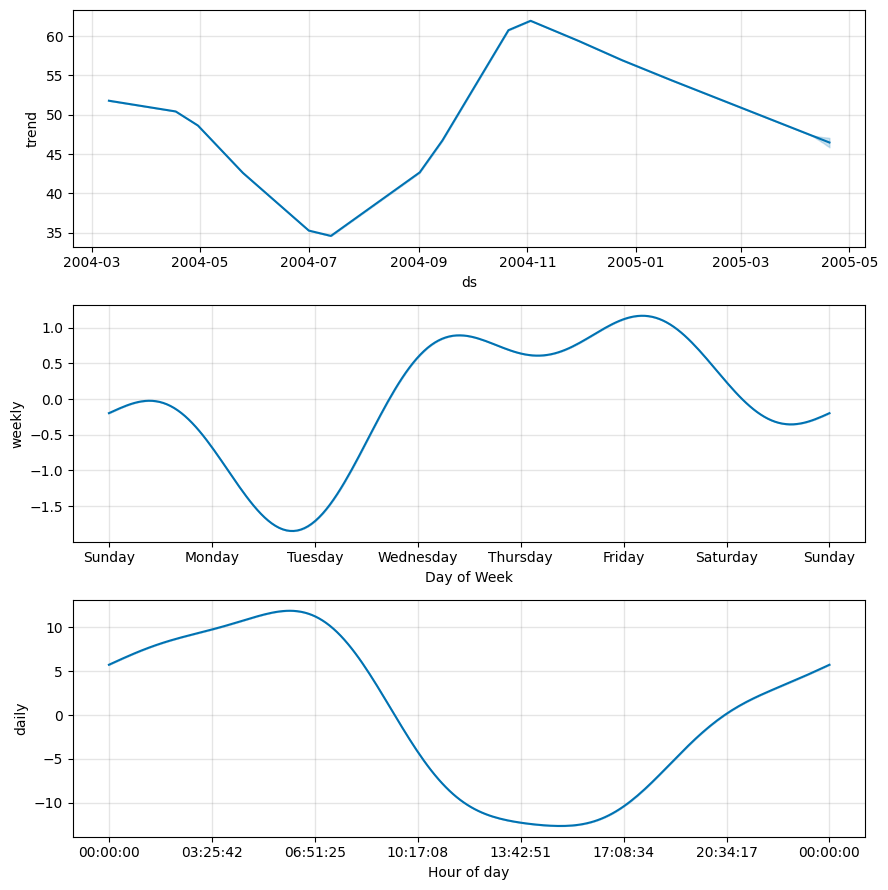

In [77]:
fig2 = model.plot_components(forecast)